<a href="https://colab.research.google.com/github/Nico-lly/INFNET-bootcamp-/blob/main/Desafio_estatistica_descritiva_e_cria%C3%A7%C3%A3o_de_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando os dados de weatherHistory.csv : 

 1 ) Limpar os dados (se e quando necessário) 

 2)  Verificar as correlações entre as diversas colunas de dados

 3)  Analisar se existe uma relação entre Umidade e Temperatura?

 4)  Construir um modelo de predição que dado a Umidade calcule a temperatura

    3.1 ) Testar os  modelos de simples e Polinomial 
 
    3.2)  Avaliar cada um dos modelos e determinar qual seria o recomendado (com justificativas) 
 
 5)  Implementar um(s) modelo(s) de regressão linear usando Umidade e Visibilidade com "features" e temperatura como valor a se predizer

 6)  Discutir e apresentar os resultados 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

Abrindo e conhecendo os dados

In [ ]:


weatherHistory = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/Notebooks/main/RegressaoLinear/weatherHistory.csv')
weatherHistory.shape

(96453, 12)

In [ ]:
weatherHistory.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:

weatherHistory.notna

<bound method DataFrame.notna of                       Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting

In [ ]:
#ISSO AQUI É TOP 

weatherHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
weatherHistory.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
weatherHistory['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
#ISSO AQUI É TOP 

weatherHistory['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
weatherHistory['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [ ]:
weatherHistory['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [ ]:
#ISSO FOI TUDO TB 

weatherHistory.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
#Limpando os dados (data wraling)

#criando uma categoria pra os NAN dessa coluna
weatherHistory['Precip Type'].replace(np.nan , "unknow",inplace = True)


In [ ]:
#tirando a coluna loud cloud
df = weatherHistory[["Temperature (C)","Precip Type", "Apparent Temperature (C)","Humidity", "Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)","Pressure (millibars)"]]	
df


,Temperature (C),Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,rain,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,rain,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,rain,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,rain,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,26.016667,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


Normalizar os dados

In [ ]:
#Não se normaliza a variável target, pois queremos atingir aqueles valores exatos, normaliza somente as variaveis preditivas
#Como só vamos utilizar temperatura e humidade, humidade já está normalizada, não realizaremos agora esse metodo

In [ ]:
#Criar um valor booleano para as categorias de principe type

dummy = pd.get_dummies(df['Precip Type'])
dummy.head()

,rain,snow,unknow
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
#mudar o nome das colunas e concatenar no nadaframe as novas colunas booleanas

dummy.rename(columns = {'rain':'Precip_Type_Rain', 'snow':'Precip_Type_Snow', 'unknow':'Precip_Type_Unknow'}, inplace = True)

In [ ]:
df = pd.concat([df, dummy], axis = 1)
df.head()

,Temperature (C),Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip_Type_Rain,Precip_Type_Snow,Precip_Type_Unknow
0,9.472222,rain,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1,0,0
1,9.355556,rain,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1,0,0
2,9.377778,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,0,0
3,8.288889,rain,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1,0,0
4,8.755556,rain,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1,0,0


In [ ]:
#normalizar 
df['Wind Speed (km/h)'] = df['Wind Speed (km/h)']/df['Wind Speed (km/h)'].max()
df['Wind Bearing (degrees)'] = df['Wind Bearing (degrees)']/df['Wind Bearing (degrees)'].max()
df['Visibility (km)'] = df['Visibility (km)']/df['Visibility (km)'].max()
df['Pressure (millibars)'] = df['Pressure (millibars)']/df['Pressure (millibars)'].max()

Análise dos dados


In [ ]:
# Testando a correlação entre as variáveis
df.corr(method= 'pearson')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip_Type_Rain,Precip_Type_Snow,Precip_Type_Unknow
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.553873,-0.562620,-0.011833
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,0.555889,-0.565207,-0.009554
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.228314,0.232113,0.004044
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.063988,-0.067928,0.011240
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,0.041406,-0.041984,-0.001210
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,0.317667,-0.312875,-0.048994
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.011103,0.009008,0.010006
Precip_Type_Rain,0.553873,0.555889,-0.228314,0.063988,0.041406,0.317667,-0.011103,1.000000,-0.973759,-0.202239
Precip_Type_Snow,-0.562620,-0.565207,0.232113,-0.067928,-0.041984,-0.312875,0.009008,-0.973759,1.000000,-0.025947
Precip_Type_Unknow,-0.011833,-0.009554,0.004044,0.011240,-0.001210,-0.048994,0.010006,-0.202239,-0.025947,1.000000


In [ ]:
df[['Humidity', 'Temperature (C)']].corr()

,Humidity,Temperature (C)
Humidity,1.000000,-0.632255
Temperature (C),-0.632255,1.000000


(0.0, 42.99194444444444)

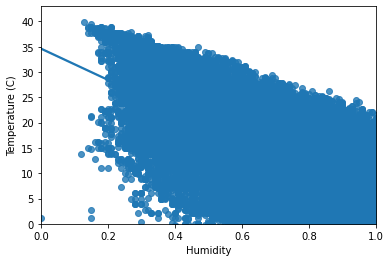

In [ ]:
sns.regplot(x="Humidity", y="Temperature (C)", data=df)
plt.ylim(0,)

(0.0, 41.25611111111111)

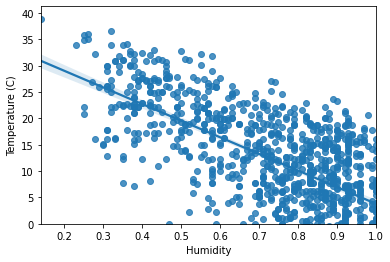

In [ ]:
#Como a quantidade de dados é muito grande, define-se uma amostra para compreender melhor a distribuição dos dados

df_smpl = df.sample(1000)
sns.regplot(x="Humidity", y="Temperature (C)", data = df_smpl)
plt.ylim(0,)

Fazendo a regreção linear

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#criando o objeto de regressão linear

l_model = LinearRegression()
l_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Separando as colunas em x e y
X = df[["Humidity"]]
Y = df["Temperature (C)"]

In [ ]:
#Criando  o train test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
#ajustando/treinando o modelo

l_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Fazendo a predição

Y_pred = l_model.predict(X_test)

In [ ]:
#Testando a confiabilidade do modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print("R2: ", r2_score(Y_test, Y_pred)) #Porcentagem de acerto
print("MAE: ", mean_absolute_error(Y_test, Y_pred)) #Media modular das variâncias
print("MSE: ", mean_squared_error(Y_test, Y_pred)) #Média das variâncias ao quadrado (Da maior importância aos outliers)
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)) ) #Raiz quadrada da média das variâncias ao quadrado (Transforma p/ a mesma escala da MAE)

R2:  0.3991287441887267
MAE:  6.049223370380227
MSE:  55.17543604305547
RMSE:  7.428016965722108


Fazendo a regressão linear multipla

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Criando o objeto de regressão linear

LModel = LinearRegression()

In [ ]:
#Separando as variáveis em X e Y

X = df[['Humidity', 'Pressure (millibars)', 'Precip_Type_Rain', 'Precip_Type_Snow']]
Y = df['Temperature (C)']

In [ ]:
#Criando train e test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
#Treinando o modelo

LModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Fazendo a previsão

Y_hat = LModel.predict(X_test)

In [ ]:
#Aferindo a confiabilidade do modelo 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print('R2:', r2_score(Y_hat, Y_test))
print('MAE:', mean_absolute_error(Y_hat, Y_test))
print('MSE:', mean_squared_error(Y_hat, Y_test))
print('RMSE:', np.sqrt(mean_squared_error(Y_hat, Y_test)))

R2: 0.27609363216136285
MAE: 5.090319663250882
MSE: 37.94815357216853
RMSE: 6.160207266981244


Fazendo a regressão polinomial

In [ ]:
#A regressão linear parece não resolver o nosso problema, pois mesmo com uma variância constante, a distribuição ainda é muito dispersa
#Vamos tentar um modelo de regressão polinomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["Humidity"]]
Y = df["Temperature (C)"]
X.shape

(96453, 1)

In [ ]:
#Criando treino x teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
#criando o modelo para transformar o X num polinomio 
poly_model = PolynomialFeatures(degree=3)
X_PTrain = poly_model.fit_transform(X_train)
X_PTest = poly_model.fit_transform(X_test)

In [ ]:
#Criando a regressão linear por que a regressão polinomial é uma regressão linear de polinômios e fitando no modelo
ln_model = LinearRegression()

In [ ]:
#Treinando o modelo com as variaveis de treino
ln_model.fit(X_PTrain, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Tirar o score saber se O MODELO é preciso

ln_model.score(X_PTrain, Y_train)

0.6573749640445992

In [ ]:
### FAZENDO A PREDIÇÃO ### 

Yhat = ln_model.predict(X_PTest)
Yhat[0:5]

array([24.45104606, 16.66220217, -5.08043341,  9.92126511, 14.45480097])

In [ ]:
#### AVALIANDO O MODELO ###

#Criar o R^2, o mean square error e o mean absolut error para saber se A PREDIÇÃO é precisa

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
    

In [ ]:
print('R2:', r2_score(Y_hat, Y_test))
print('MAE:', mean_absolute_error(Y_hat, Y_test))
print('MSE:', mean_squared_error(Y_hat, Y_test))
print('RMSE:', np.sqrt(mean_squared_error(Y_hat, Y_test)))

R2: 0.27609363216136285
MAE: 5.090319663250882
MSE: 37.94815357216853
RMSE: 6.160207266981244
